In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import glob

import librosa
import librosa.display
import IPython.display as ipd
import soundfile as sf

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [3]:
directory = 'C:\\Users\\yasha\\OneDrive\\Desktop\\music21\\music21datasetwav\\*.wav'
wav_files = glob.glob(directory)
for file in wav_files:
    print(file)

C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\a5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\a5_flat_piano_trimmed.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\a5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\a5_sharp_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\b5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\b5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\c5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\c5_sharp_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\d5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\d5_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\d5_sharp_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\e5_flat_piano.wav
C:\Users\yasha\OneDrive\Desktop\music21\music21datasetwav\e5_piano.wav
C:\Users\yasha\OneDrive\De

In [4]:
ipd.Audio(wav_files[0])

In [8]:
y, sr = librosa.load(wav_files[0])

print(f"""
    y : {y}
    sr : {sr}
    length of audio sample: {len(y)}    
""")


    y : [ 9.5460564e-06 -2.7835369e-05  6.0357153e-05 ...  9.2519508e-07
 -8.7190692e-06 -9.7749194e-08]
    sr : 22050
    length of audio sample: 55135    


In [11]:
#The two-second audios contained audio in mostly the first half, so trimmed every audio in half

for file_path in wav_files:
    y, sr = librosa.load(file_path)
    trimmed_audio = y[:len(y)//2]
    sf.write(file_path, trimmed_audio, sr)

In [18]:
ipd.Audio(wav_files[0])


In [20]:
#After trimming
y, sr = librosa.load(wav_files[0])

print(f"""
    y : {y}
    sr : {sr}
    length of audio sample: {len(y)}    
""")


    y : [ 0.0000000e+00 -3.0517578e-05  3.0517578e-05 ...  2.4414062e-04
  1.8310547e-04  1.2207031e-04]
    sr : 22050
    length of audio sample: 27567    


In [21]:
pd.Series(y)

0        0.000000
1       -0.000031
2        0.000031
3       -0.001160
4       -0.002686
           ...   
27562    0.000366
27563    0.000305
27564    0.000244
27565    0.000183
27566    0.000122
Length: 27567, dtype: float32

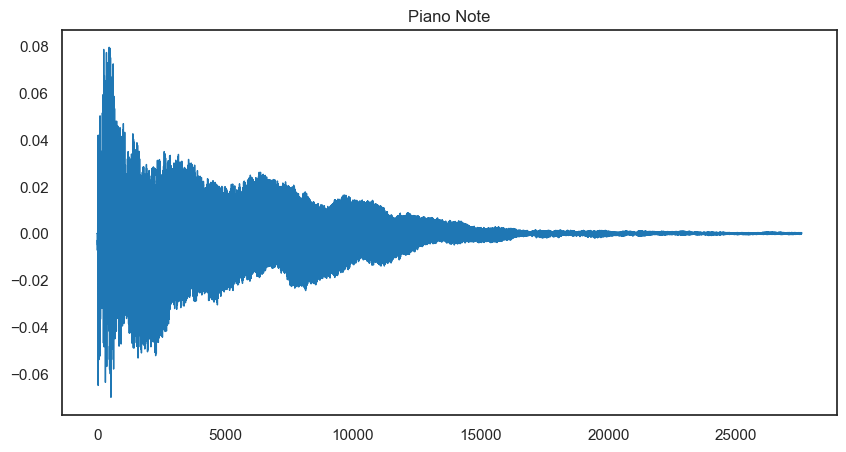

In [25]:
pd.Series(y).plot(figsize=(10,5), lw=1, title='Piano Note')
plt.show()

Spectrogram

In [26]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [27]:
S_db.shape

(1025, 54)

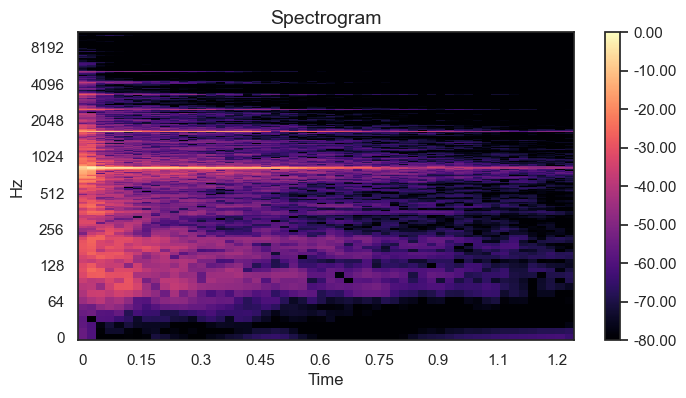

In [33]:
#Plot transformed audio 
fig, ax = plt.subplots(figsize=(8,4))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectrogram', fontsize=14)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

Mel-Spectrogram

In [35]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


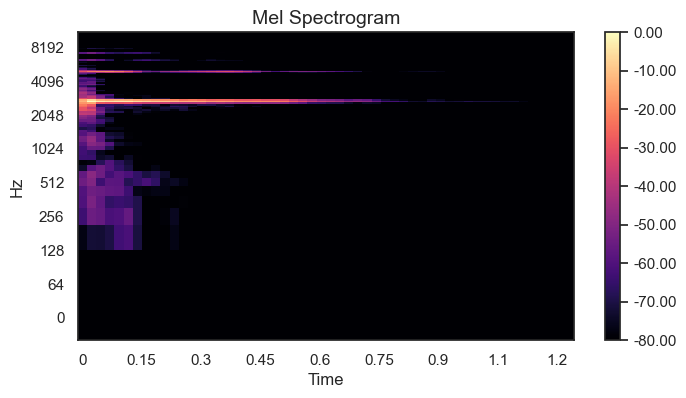

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Mel Spectrogram', fontsize=14)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()